In [1]:
%matplotlib inline

In [2]:
import sys 
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import cv2

from blurnet.utils import dataloader, GaussianBlurAll

In [15]:
def imshow(img, title='',filename='', scale=True):
    img = img / 2 + 0.5     # unnormalize
    if type(img) == torch.Tensor:
        img = img.numpy()
        plt.imshow(np.transpose(img, (1, 2, 0)))
    else:  # if type(img) == numpy.ndarray
        plt.imshow(img)
    if not scale:
        plt.xticks([])  # if you want to remove scale axes
        plt.yticks([])
    if title:
        plt.title(title)
    if filename:
        plt.savefig(filename)  # added for saving the image
    plt.show()

In [4]:
trainloader, testloader, classes = dataloader(32)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

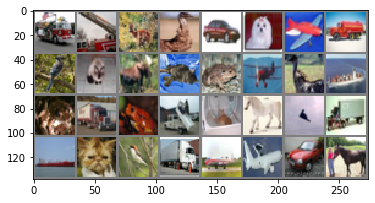

In [6]:
# show images
imshow(torchvision.utils.make_grid(images))

In [8]:
half = images.size(0) // 2
images[:half].size()

torch.Size([16, 3, 32, 32])

In [9]:
images.chunk(2)[0].size()

torch.Size([16, 3, 32, 32])

In [10]:
half1, half2 = images.chunk(2)

In [11]:
half1.size()

torch.Size([16, 3, 32, 32])

In [12]:
torch.cat((half1, half2))

tensor([[[[ 1.0000,  0.9765,  0.9765,  ...,  0.9765,  0.9765,  1.0000],
          [ 1.0000,  0.9765,  0.9765,  ...,  0.9608,  0.9608,  0.9843],
          [ 1.0000,  0.9922,  0.9922,  ...,  0.9765,  0.9686,  1.0000],
          ...,
          [-0.0510, -0.0667, -0.0510,  ..., -0.0353, -0.0431, -0.0353],
          [-0.0353, -0.0588, -0.0824,  ..., -0.0118, -0.0353, -0.0353],
          [ 0.0039, -0.0196, -0.0196,  ..., -0.0118, -0.0118, -0.0118]],

         [[ 1.0000,  0.9765,  0.9765,  ...,  0.9765,  0.9765,  1.0000],
          [ 1.0000,  0.9765,  0.9765,  ...,  0.9608,  0.9608,  0.9843],
          [ 1.0000,  0.9922,  0.9922,  ...,  0.9765,  0.9686,  1.0000],
          ...,
          [-0.0510, -0.0667, -0.0510,  ..., -0.0353, -0.0431, -0.0353],
          [-0.0353, -0.0588, -0.0824,  ..., -0.0118, -0.0353, -0.0353],
          [ 0.0039, -0.0196, -0.0196,  ..., -0.0118, -0.0118, -0.0118]],

         [[ 1.0000,  0.9765,  0.9765,  ...,  0.9765,  0.9765,  1.0000],
          [ 1.0000,  0.9765,  

In [13]:
half1_blur = GaussianBlurAll(half1, (7,7), 1)

In [14]:
output = torch.cat((half1_blur, half2))

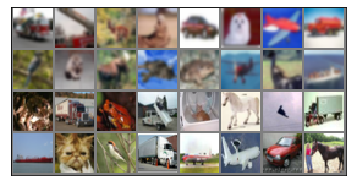

In [16]:
# show images
imshow(torchvision.utils.make_grid(output), filename='./images/blur-half-data.png', scale=False)